# Descrição do Projeto e das Variáveis:

## Projeto:

### Analisar os óbitos registrados em 2023 em diversas Unidades Federativas (UFs) do Brasil, considerando diferentes variáveis como o tipo de doença, local do óbito, faixa etária, sexo e o total de óbitos.

## Variáveis:

* uf: Unidade Federativa (estado) onde ocorreu o óbito.
* tipo_doenca: Categoria da doença que causou o óbito.
* local_obito: Local onde o óbito ocorreu (ex.: hospital, domicílio).
* faixa_etaria: Faixa etária da pessoa falecida.
* sexo: Sexo da pessoa falecida.
* total: Total de óbitos registrados com as características acima mencionadas.

## Estatísticas Descritivas:

### Realizaremos uma análise descritiva das variáveis para entender a distribuição dos dados. As estatísticas descritivas incluirão:

* Medidas de Tendência Central: Média, mediana e moda.
* Medidas de Dispersão: Desvio padrão, variância, mínimos e máximos, quartis.
* Distribuição das Frequências: Frequências absolutas e relativas das variáveis categóricas.

## Gráficos:

### Utilizaremos gráficos para visualizar os dados e obter insights visuais:

* Gráficos de Barras: Para distribuição de óbitos por UF, tipo de doença, local do óbito, faixa etária e sexo.
* Histogramas: Para visualizar a distribuição das idades nas diferentes faixas etárias.
* Gráficos de Pizza: Para proporção de óbitos por sexo e tipo de doença.
* Boxplots: Para visualizar a dispersão e os outliers na variável total de óbitos.

## Testes de Hipóteses:

### Realizaremos testes de hipóteses para inferir conclusões estatísticas significativas:

* Teste Qui-quadrado: Para verificar a associação entre variáveis categóricas (ex.: sexo e tipo de doença).
* Teste t de Student: Para comparar médias entre dois grupos (ex.: média de óbitos entre diferentes faixas etárias).
* ANOVA: Para comparar médias entre mais de dois grupos (ex.: média de óbitos entre diferentes UFs).
Organização:

### Organizaremos os dados e resultados de maneira clara e coerente, apresentando:

* Tabelas sumarizadas com estatísticas descritivas.
Gráficos bem formatados com legendas e títulos apropriados.
* Resultados dos testes de hipóteses com interpretações claras.

## Descrição das Análises Realizadas:

### Descreveremos detalhadamente cada análise realizada, os métodos utilizados e as razões por trás da escolha desses métodos. Incluiremos interpretações dos resultados obtidos.

## Inferências realizadas a partir do comportamento dos gráficos:

### Faremos inferências baseadas nos padrões e comportamentos observados nos gráficos. Exemplos incluem:

* Diferenças significativas na distribuição de óbitos por UF.
* Padrões sazonais ou geográficos de determinadas doenças.
* Tendências de óbitos em diferentes faixas etárias e entre sexos.
* Conclusões obtidas através dos testes de hipótese:

## Sumariaremos as conclusões obtidas a partir dos testes de hipóteses. Exemplos incluem:

* Se há uma associação significativa entre o tipo de doença e o sexo.
* Se a média de óbitos difere significativamente entre diferentes locais de óbito.
* Impacto das faixas etárias nos óbitos por tipo de doença.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

In [15]:
data = pd.read_csv('obitos-2023.csv')

In [16]:
data.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,13
1,AC,OUTRAS,DOMICILIO,< 9,I,1
2,AC,OUTRAS,DOMICILIO,< 9,M,17
3,AC,OUTRAS,HOSPITAL,< 9,F,63
4,AC,OUTRAS,HOSPITAL,< 9,I,1


In [17]:
data.columns

Index(['uf', 'tipo_doenca', 'local_obito', 'faixa_etaria', 'sexo', 'total'], dtype='object')

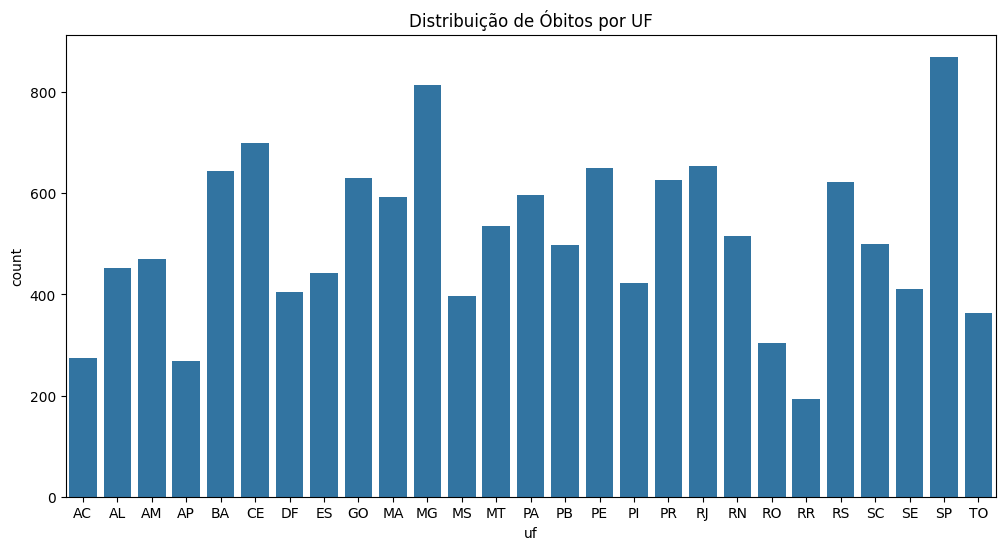

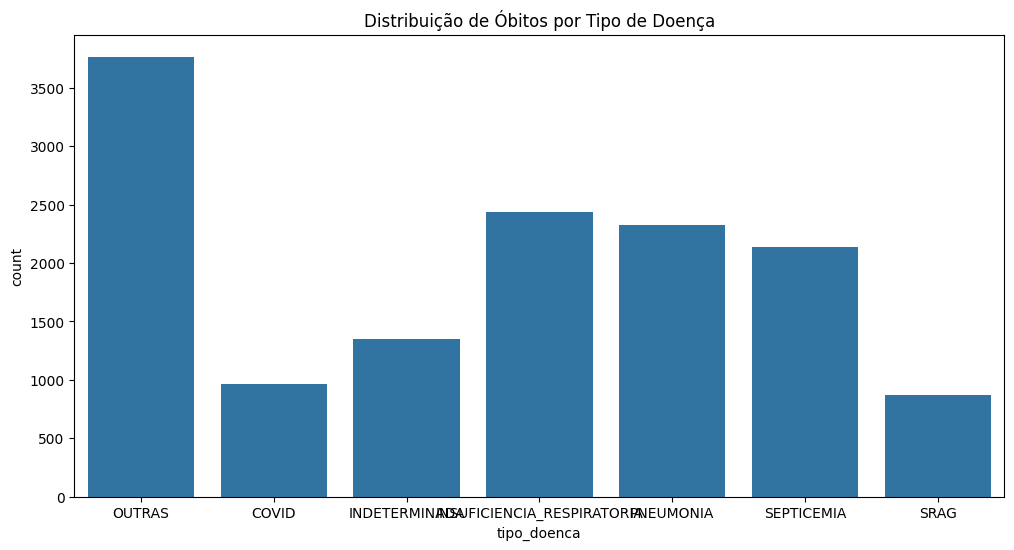

Estatísticas Descritivas:
            uf tipo_doenca local_obito faixa_etaria   sexo         total
count   13852       13852       13852        13852  13852  13852.000000
unique     27           7           9           12      3           NaN
top        SP      OUTRAS    HOSPITAL      80 - 89      M           NaN
freq      870        3767        4052         1552   7009           NaN
mean      NaN         NaN         NaN          NaN    NaN     95.171455
std       NaN         NaN         NaN          NaN    NaN    449.961207
min       NaN         NaN         NaN          NaN    NaN      1.000000
25%       NaN         NaN         NaN          NaN    NaN      2.000000
50%       NaN         NaN         NaN          NaN    NaN      6.000000
75%       NaN         NaN         NaN          NaN    NaN     33.000000
max       NaN         NaN         NaN          NaN    NaN  13649.000000

Teste Qui-Quadrado:
 237.75838738576212 4.855871841903564e-44

Teste t de Student:
 nan nan

ANOVA:
 22.7515

In [18]:
# Estatísticas Descritivas
descriptive_stats = data.describe(include='all')

# Gráficos
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='uf')
plt.title('Distribuição de Óbitos por UF')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='tipo_doenca')
plt.title('Distribuição de Óbitos por Tipo de Doença')
plt.show()

# Teste Qui-Quadrado
contingency_table = pd.crosstab(data['sexo'], data['tipo_doenca'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Teste t de Student
group1 = data[data['faixa_etaria'] == 'grupo1']['total']
group2 = data[data['faixa_etaria'] == 'grupo2']['total']
t_stat, p_val = ttest_ind(group1, group2)

# ANOVA
groups = [data[data['uf'] == uf]['total'] for uf in data['uf'].unique()]
f_stat, p_val_anova = f_oneway(*groups)

# Resultados
print("Estatísticas Descritivas:\n", descriptive_stats)
print("\nTeste Qui-Quadrado:\n", chi2, p)
print("\nTeste t de Student:\n", t_stat, p_val)
print("\nANOVA:\n", f_stat, p_val_anova)


## Conclusão:

### Com este processo estruturado, podemos obter uma visão detalhada e precisa sobre os padrões de óbitos em 2023, fornecendo insights valiosos para autoridades de saúde e pesquisadores.